# Add Bookie Odds to `games_df`

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

This notebook creates a df, games_df, that is a merge of the game_df from the otehr notebook with the coresponding implied bookie odds for each game/row.  Bookie odds are averaged between all available bookie odds, 15 bookies in total.

In [2]:
# Read tennis odds from Kaggle Dataset

df = pd.read_csv('t_odds.csv')

In [3]:
# Read the DataFrame constructed as game_df.

gdf = pd.read_pickle('oct_23.pkl')

In [4]:
# Get just the betting odds from all bookies, for season 2016
# Extension 1: fix 2017 data in games_df module to use 2017 as holdout

df = df[df.tournament_name.str.contains("atp")]
df = df.loc[df.doubles == 0]
df.date = pd.to_datetime(df.date)
df = df.loc[(df.date >= datetime.date(month=1, year=2016, day=1)) &
            (df.date <= datetime.date(month=1, year=2017, day=1))]

In [5]:
df = df.drop(['10bet_payout', '18bet_payout', '5dimes_payout', 'bet-at-home_payout',
         'bet365_payout', 'bethard_payout', 'betolimp_payout', 'betrally_payout',
         'bwin_payout', 'jetbull_payout', 'pinnacle_payout', 'marathonbet_payout',
         'tempobet_payout', 'tonybet_payout', 'unibet_payout'], axis=1)

In [6]:
# Get just the rows from game_df in saeson 2016.

gdf.tourney_date = pd.to_datetime(gdf.tourney_date)
gdf = gdf.loc[(gdf.tourney_date >= datetime.date(month=1, year=2016, day=1)) & 
             (gdf.tourney_date <= datetime.date(month=1, year=2017, day=1))]

In [7]:
# Helper fxn.

def convert_name(full_name):
    """
    Convert First/Last name combo to Last Name, First Initial.
    E.g. Roger Federer --> Federer R.
    """
    x = full_name.split()
    return x[1].title() + " " + x[0][0].upper() + "."

In [8]:
# Now apply name conversion to all of gdf.

gdf['player1_name'] = gdf.player1_name.apply(convert_name)
gdf['player2_name'] = gdf.player2_name.apply(convert_name);

In [9]:
# Helper fxn.

def implied_probability(decimal_odds):
    """
    Convert a player's decimal odds to implied probabilty.
    """
    
    return (1/decimal_odds) * 100

In [10]:
odds_columns = ['10bet_player_1_odd',
       '10bet_player_2_odd', '18bet_player_1_odd',
       '18bet_player_2_odd', '5dimes_player_1_odd',
       '5dimes_player_2_odd', 'bet-at-home_player_1_odd',
       'bet-at-home_player_2_odd', 'bet365_player_1_odd',
       'bet365_player_2_odd', 'bethard_player_1_odd',
       'bethard_player_2_odd', 'betolimp_player_1_odd',
       'betolimp_player_2_odd', 'betrally_player_1_odd',
       'betrally_player_2_odd', 'bwin_player_1_odd',
       'bwin_player_2_odd', 'jetbull_player_1_odd',
       'jetbull_player_2_odd',
       'marathonbet_player_1_odd', 'marathonbet_player_2_odd',
       'pinnacle_player_1_odd', 'pinnacle_player_2_odd',
       'tempobet_player_1_odd', 'tempobet_player_2_odd',
       'tonybet_player_1_odd', 'tonybet_player_2_odd',
       'unibet_player_1_odd', 'unibet_player_2_odd']

player1_odds_columns = ['10bet_player_1_odd', '18bet_player_1_odd', '5dimes_player_1_odd',
'bet-at-home_player_1_odd', 'bet365_player_1_odd', 'bethard_player_1_odd',
'betolimp_player_1_odd', 'betrally_player_1_odd', 'bwin_player_1_odd',
'jetbull_player_1_odd', 'marathonbet_player_1_odd', 'pinnacle_player_1_odd',
'tempobet_player_1_odd', 'tonybet_player_1_odd', 'unibet_player_1_odd']

player2_odds_columns = ['10bet_player_2_odd', '18bet_player_2_odd', '5dimes_player_2_odd',
'bet-at-home_player_2_odd', 'bet365_player_2_odd', 'bethard_player_2_odd',
'betolimp_player_2_odd', 'betrally_player_2_odd', 'bwin_player_2_odd',
'jetbull_player_2_odd', 'marathonbet_player_2_odd', 'pinnacle_player_2_odd',
'tempobet_player_2_odd', 'tonybet_player_2_odd', 'unibet_player_2_odd']

In [11]:
# Convert to implied probability
for odds_column in odds_columns:
    df[odds_column] = df[odds_column].apply(implied_probability)

In [12]:
stds1 = []
stds2 = []
for i in range(len(df)):
    stds1.append(df.iloc[i][player1_odds_columns].std())
    stds2.append(df.iloc[i][player2_odds_columns].std())

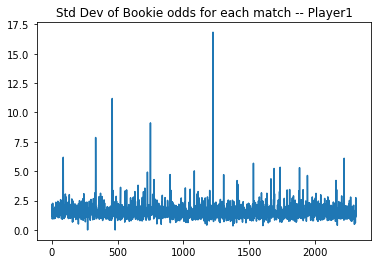

In [13]:
# Quick diversion: How much do bookies' implied odds differ?
# One plot for player1 odds, one for player2

plt.title("Std Dev of Bookie odds for each match -- Player1")
plt.plot(stds1);

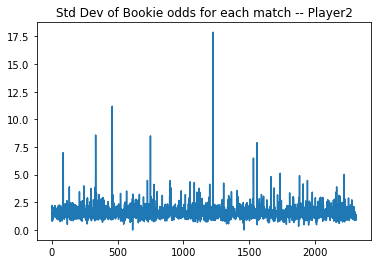

In [14]:
plt.title("Std Dev of Bookie odds for each match -- Player2")
plt.plot(stds2);

In [15]:
# Compute avg implied probability and insert into columns.
df['player1_avg_odds'] = df[player1_odds_columns].mean(axis=1)
df['player2_avg_odds'] = df[player2_odds_columns].mean(axis=1)

# Drop unneeded columns.
df = df.drop(player1_odds_columns, axis=1)
df = df.drop(player2_odds_columns, axis=1)

In [16]:
# Get just the month-year info from gdf.tourney_date, and ignore the rest.\
# day is set to equal 1 in all cases: this is ok for my purposes (i think)

gdf['merge_date'] = gdf.tourney_date.astype(str).apply(lambda x: x[:7])
gdf.merge_date = gdf.merge_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').date())

# Do the same for df.date.

df['merge_date'] = df.date.astype(str).apply(lambda x: x[:7])
df.merge_date = df.merge_date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m').date())

In [17]:
#### The case where player1 / player2 tuples DO match up.

# Create a new column to merge on: tuple of player names.

# Create new column
df['players_forward'] = df.player_1_name + "," + df.player_2_name
gdf['players_forward'] = gdf.player1_name + "," + gdf.player2_name

# Split into list object
gdf.players_forward = gdf.players_forward.apply(lambda x: x.split(','))
df.players_forward = df.players_forward.apply(lambda x: x.split(','))

# Convert to tuple.
gdf.players_forward = gdf.players_forward.apply(lambda x: tuple(x))
df.players_forward = df.players_forward.apply(lambda x: tuple(x))

In [18]:
#### The case where player1 / player2 tuples DO NOT match up.

# Create a new column to merge on: tuple of player names.

# Create new column
df['players_backward'] = df.player_2_name + "," + df.player_1_name
gdf['players_backward'] = gdf.player1_name + "," + gdf.player2_name

# Split into list object
gdf.players_backward = gdf.players_backward.apply(lambda x: x.split(','))
df.players_backward = df.players_backward.apply(lambda x: x.split(','))

# Convert to tuple.
gdf.players_backward = gdf.players_backward.apply(lambda x: tuple(x))
df.players_backward = df.players_backward.apply(lambda x: tuple(x))

In [19]:
# Create merged DataFrames.

forward_match = gdf.merge(df, on=['merge_date', 'players_forward'])
backward_match = gdf.merge(df, on=['merge_date', 'players_backward'])

In [20]:
# Switch the p1 and p2 probabilities in backward_match, to correct for the misordering.

actual_p1_prob = backward_match.player2_avg_odds.copy(deep=True)
actual_p2_prob = backward_match.player1_avg_odds.copy(deep=True)
backward_match.player1_avg_odds = actual_p1_prob
backward_match.player2_avg_odds = actual_p2_prob

In [21]:
# DataFrames ready to concat and reorder based on tourney_date.

games_df = pd.concat([forward_match, backward_match])

In [22]:
### May need to add more columns -- don't remember off the top if my head what exactly went into games_df before.

game = ['game_index', 'label', 'player1_avg_odds', 'player2_avg_odds']

deltas = ['delta_1stIn_expw', 'delta_1stIn_mavg', 'delta_1stWon_expw',
'delta_1stWon_mavg', 'delta_2ndWon_expw', 'delta_2ndWon_mavg',
'delta_SvGms_expw', 'delta_SvGms_mavg', 'delta_ace_expw',
'delta_ace_mavg', 'delta_age', 'delta_bpFaced_expw', 'delta_bpFaced_mavg',
'delta_bpSaved_expw', 'delta_bpSaved_mavg', 'delta_df_expw',
'delta_df_mavg', 'delta_ht', 'delta_rank', 'delta_rank_points',
'delta_svpt_expw', 'delta_svpt_mavg']

cols = game + deltas
games_df = games_df[cols]
games_df = games_df.sort_values('game_index')

In [23]:
# Final Product: Games DF, with player1 and play2 implied probabilties
# There are dupes: where did they get in, how to fix?

games_df.shape

(153, 26)